# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Adam Asyari
- **Email:** M253B4KY0067@bangkit.academy
- **ID Dicoding:** Adam Asyari

## Menentukan Pertanyaan Bisnis

- Berapa kali peminjaman sepeda dalam per jam?
- Apakah ada tren musiman dalam jumlah peminjaman sepeda oleh pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv('data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours_df = pd.read_csv('data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- memmbaca file csv yang terletak pada file direktori dengan nama file day.csv dan hour csv
- pada fungsi pf.read_csv() yang dimana diambil dari libarry pandas digunakan untuk membaca file csv dan mengubhany dalam bentuk data frame 

### Assessing Data

#### Days

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
days_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print('jumlah duplikasi : ', days_df.duplicated().sum())

jumlah duplikasi :  0


In [7]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Hours

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hours_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print('Jumlah duplikasi : ', hours_df.duplicated().sum())

Jumlah duplikasi :  0


In [11]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- menggunakan method info() berfungsi untuk menampilkan data kolom, jumlah data yang tidak kosong dan tipe data masing-masing kolom
- menggunkan method isnull().sum() berfungsi untuk menghitung data yang NULL atau kosong
- menggunakan method duplicated().sum() berfungsi untuk menghitung jumlah duplikasi dalam dataset
- menggunakan method describe() berfungsi untuk menampilkan deskripsi pada dataset

### Cleaning Data

#### Days

In [12]:
date_time = ["dteday"]

for column in date_time:
    days_df[column] = pd.to_datetime(days_df[column])

In [13]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Hours

In [14]:
date_time = ["dteday"]

for column in date_time:
    hours_df[column] = pd.to_datetime(hours_df[column])

In [15]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- disi terjadi kesalahan pada tipe data dtday yang dimna tipe data tersebut yaitu int. Untuk mengubahnya membutuhkan pd.to_datetime() yang awalnya bertipe data int94 menjadi datetime64[ns] 
- setelah itu melihat perubahan tipe data tersebut menggunakan method info()

## Exploratory Data Analysis (EDA)

### Explore ...

In [16]:
merged_df = pd.merge(hours_df, days_df, on='dteday', suffixes=('_hour', '_day'))
merged_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [17]:
days_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
merged_df['season_day'].map(season_mapping).reset_index()

,index,season_day
0,0,Winter
1,1,Winter
2,2,Winter
3,3,Winter
4,4,Winter
...,...,...
17374,17374,Winter
17375,17375,Winter
17376,17376,Winter
17377,17377,Winter


In [19]:
seasonal_trends = merged_df.groupby(['season_day', 'yr_day'])[['casual_day', 'registered_day']].mean().reset_index()
seasonal_trends

,season_day,yr_day,casual_day,registered_day
0,1,0,243.487427,1446.380561
1,1,1,430.991720,3103.736891
2,2,0,844.023150,2934.604630
3,2,1,1369.583862,4840.640073
4,3,0,1017.183929,3458.399554
5,3,1,1389.797872,5434.446809
6,4,0,593.723055,3071.223993
7,4,1,879.645377,5005.021926


#### Hours

In [20]:
hours_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [21]:
merged_df['total_rentals'] = merged_df['casual_hour'] + merged_df['registered_hour']

In [22]:
hourly_rentals = merged_df.groupby('hr')['total_rentals'].sum().reset_index()
hourly_rentals.head(10)

,hr,total_rentals
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


**Insight:**
- pada method merge() berfungsi untuk menggabungkan 2 dataset atau lebih
- meanmpikan deskripsi dataset menggunakan describe() untuk melihat data apa saja yang ada pada dataset. Penggunaan include='all' berfungsi untk menampilkan semua data deskripsi tanpa terkecuali
- membuat peta nama season untuk code musim dan menambhkannya ke dalam data frame 
- mengelompokkkan data berdasara season_day, yr_day, casual_day dan registred_day
- menjumlahkan pinjaman sepeda dalam kurn wakrtu per jam menggunakan data casual_hour dan registred_hour
- mengelompokkan data beradasarkam jumlah pemijaman sepeda per jam   

## Visualization & Explanatory Analysis

### Pertanyaan 1:

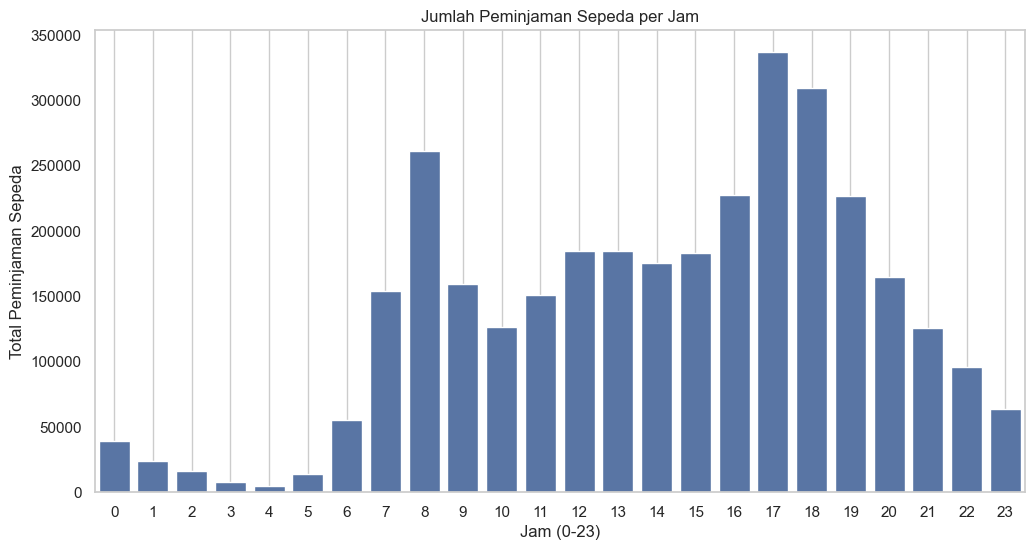

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='total_rentals', data=hourly_rentals)
plt.title('Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Total Peminjaman Sepeda')
plt.xticks(hourly_rentals['hr'])  
plt.grid()
plt.show()

### Pertanyaan 2:

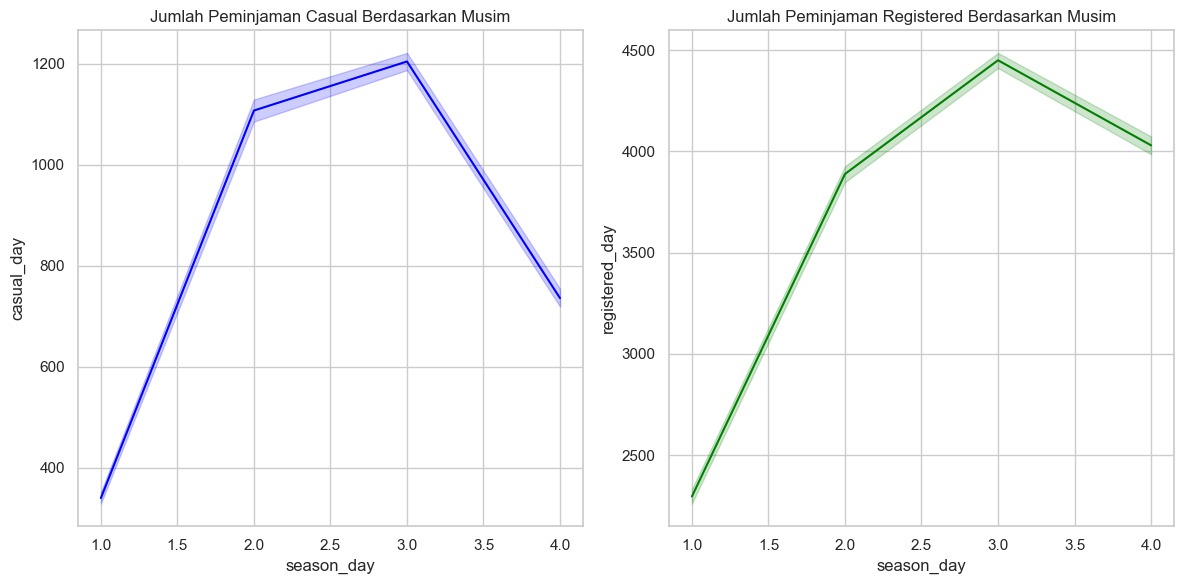

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='season_day', y='casual_day', data=merged_df, color='blue')
plt.title('Jumlah Peminjaman Casual Berdasarkan Musim')

plt.subplot(1, 2, 2)
sns.lineplot(x='season_day', y='registered_day', data=merged_df, color='green')
plt.title('Jumlah Peminjaman Registered Berdasarkan Musim')

plt.tight_layout()
plt.show()

**Insight:**
- memvusialisasikan jumlah peminjam sepda dam kurun waktu per jam menggunakan lineplot()
- memvusialisasikan jumlah peminjam sepeda per musim berdasarkan peminjam casual dan registred 

## Conclusion

- kesimpulan yang bisa di ambil untuk pertanyaan 1 adalah yang dimana pada jam 17 jumlah peminjaman sepeda pali tinggi daripda jam berikutnya 
- kesimpulan yang bisa diambil untuk pertanyaan 2 adalah yang dimana jumlah peminjaman per musim lebih banyak peminjaman regitred daridapa kasual

## Analisis Lanjutan (Opsional)

In [25]:
rfm_data = merged_df.groupby('dteday').agg({
    'cnt_day': 'sum'  
}).reset_index()

latest_date = rfm_data['dteday'].max()


rfm_data['Recency'] = (latest_date - rfm_data['dteday']).dt.days
rfm_data['Frequency'] = rfm_data['cnt_day']  
rfm_data['Monetary'] = rfm_data['cnt_day']  

rfm_data_cleaned = rfm_data[['dteday', 'Recency', 'Frequency', 'Monetary']]
rfm_data_cleaned.head()

,dteday,Recency,Frequency,Monetary
0,2011-01-01,730,23640,23640
1,2011-01-02,729,18423,18423
2,2011-01-03,728,29678,29678
3,2011-01-04,727,35926,35926
4,2011-01-05,726,36800,36800


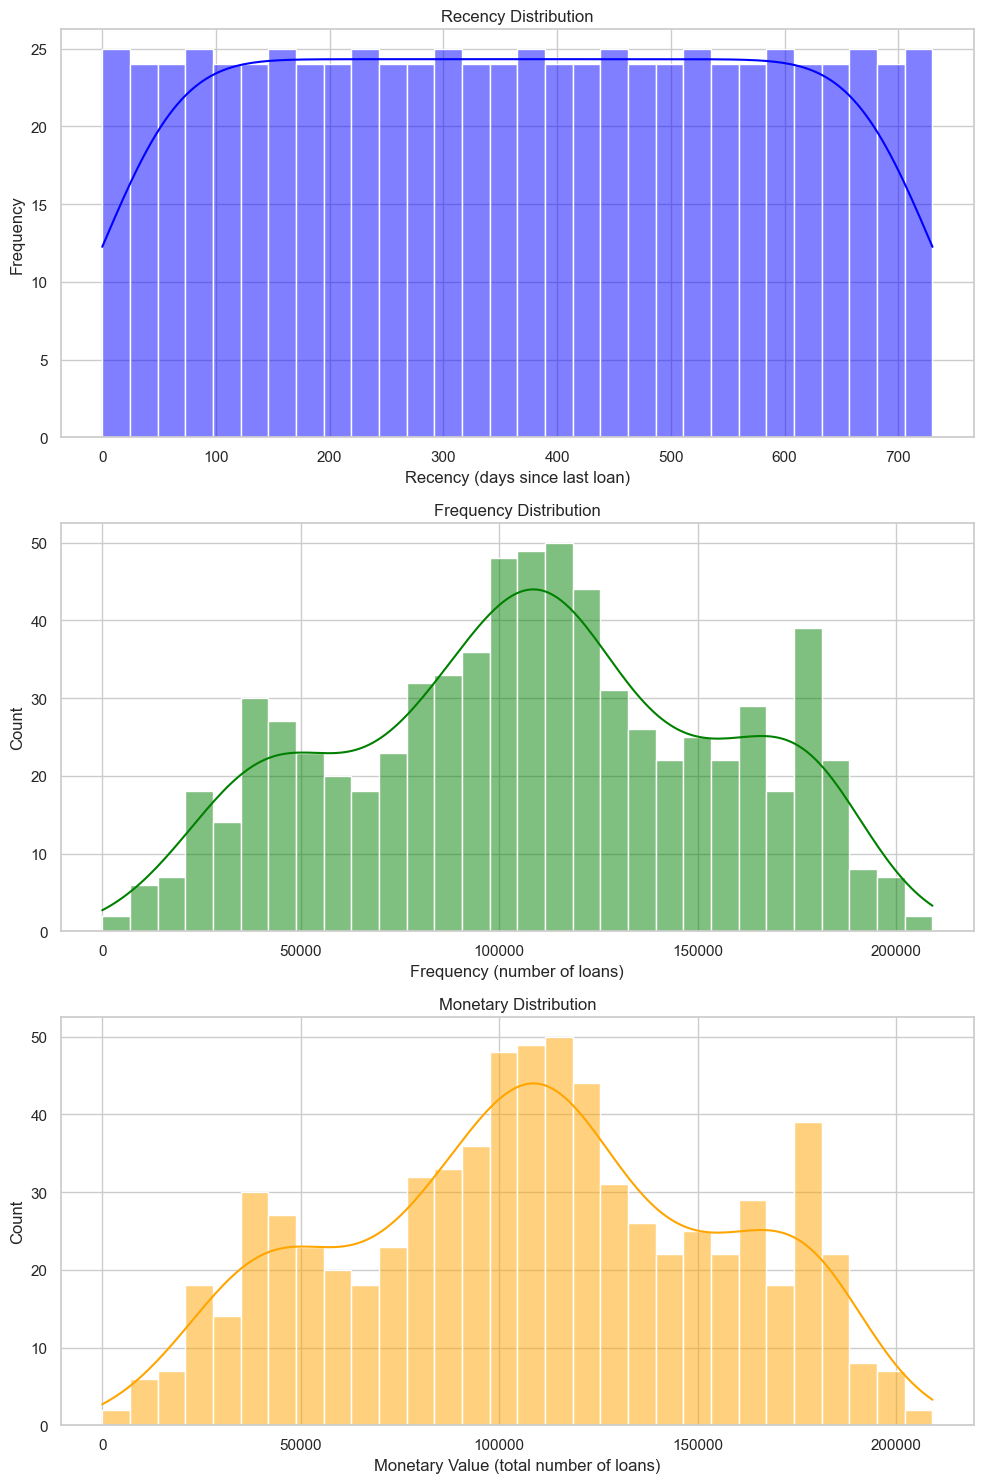

In [32]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.histplot(rfm_data_cleaned['Recency'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Recency (days since last loan)')
axes[0].set_ylabel('Frequency')

sns.histplot(rfm_data_cleaned['Frequency'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Frequency (number of loans)')
axes[1].set_ylabel('Count')

sns.histplot(rfm_data_cleaned['Monetary'], bins=30, kde=True, ax=axes[2], color='orange')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Monetary Value (total number of loans)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()